<a href="https://colab.research.google.com/github/fateme-karami/online-retail-predict/blob/main/marketing_improve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

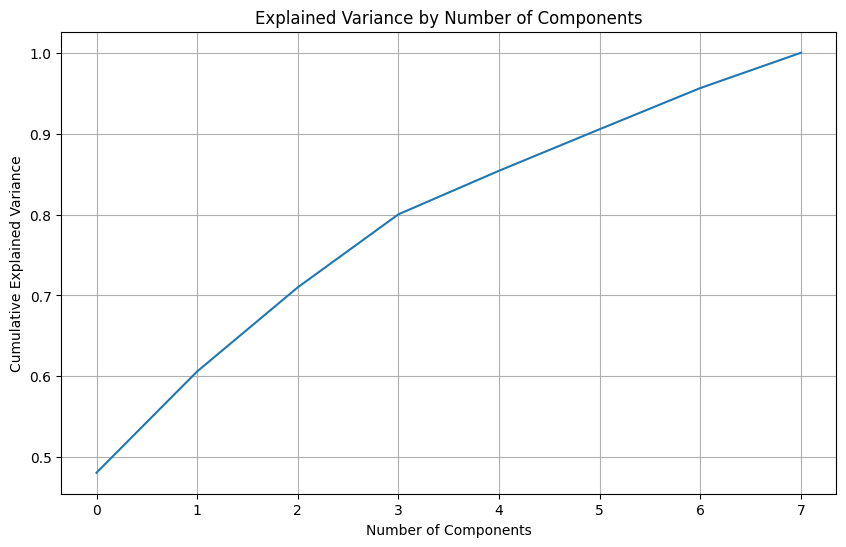

Optimal PCA components: 4


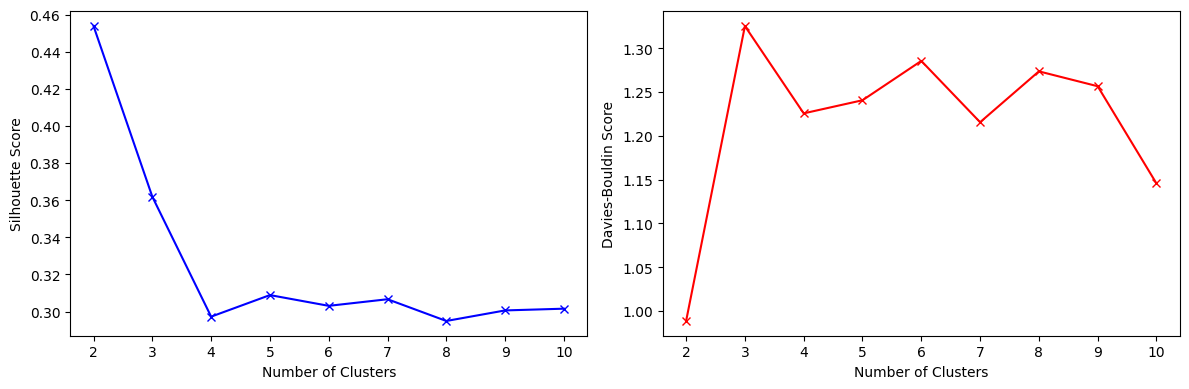

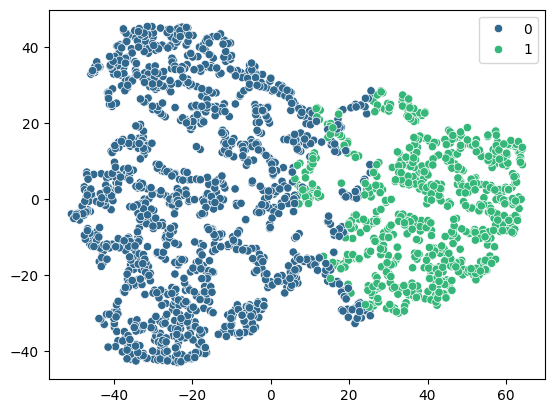

In [28]:
# Load and preprocess the data
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, delimiter='\t')

    # Selecting relevant features for customer behavior analysis
    features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    # Convert features to numeric (if any are non-numeric, they become NaN) and drop rows with NaN values
    data[features] = data[features].apply(pd.to_numeric, errors='coerce')
    data = data.dropna(subset=features)

    # Standardize the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    return data_scaled

# Determine optimal number of PCA components
def optimal_pca_components(data_scaled):
    pca = PCA()
    pca.fit(data_scaled)
    explained_variance = pca.explained_variance_ratio_

    # Plot cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    # Choose optimal components based on explained variance > 80%
    optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.8) + 1
    return PCA(n_components=optimal_components).fit_transform(data_scaled), optimal_components

# Clustering and visualization
def main(file_path):
    # Step 1: Load and preprocess data
    data_scaled = load_and_preprocess_data(file_path)

    # Step 2: PCA
    data_pca, optimal_components = optimal_pca_components(data_scaled)
    print(f"Optimal PCA components: {optimal_components}")

    # Step 3: Determine optimal clusters
    silhouette_scores = []
    db_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data_pca)
        silhouette_scores.append(silhouette_score(data_pca, cluster_labels))
        db_scores.append(davies_bouldin_score(data_pca, cluster_labels))

    # Plot silhouette and Davies-Bouldin scores
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), silhouette_scores, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), db_scores, 'rx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.tight_layout()
    plt.show()

    # Step 4: Apply optimal clustering and visualize
    optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(data_pca)
    tsne = TSNE(n_components=2, random_state=42)
    data_2d = tsne.fit_transform(data_pca)
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=clusters, palette="viridis")
    plt.show()


# Run the main pipeline
file_path = '/content/sample_data/marketing_campaign (1).csv'
main(file_path)


###Explanation
Features: Selected relevant columns for customer analysis.
Data Cleaning: Converts to numeric and removes rows with NaN.
PCA and Clustering: Updated to automatically determine optimal clusters based on silhouette scores.

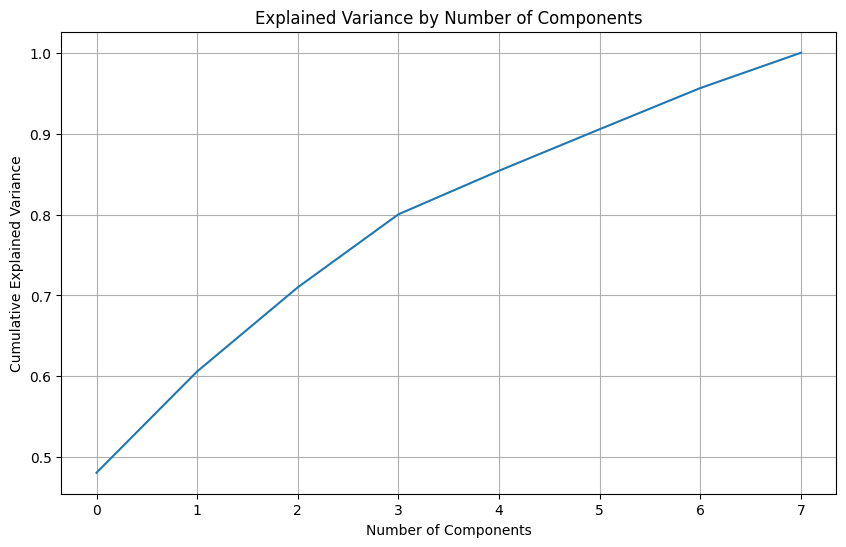

Optimal PCA components: 4


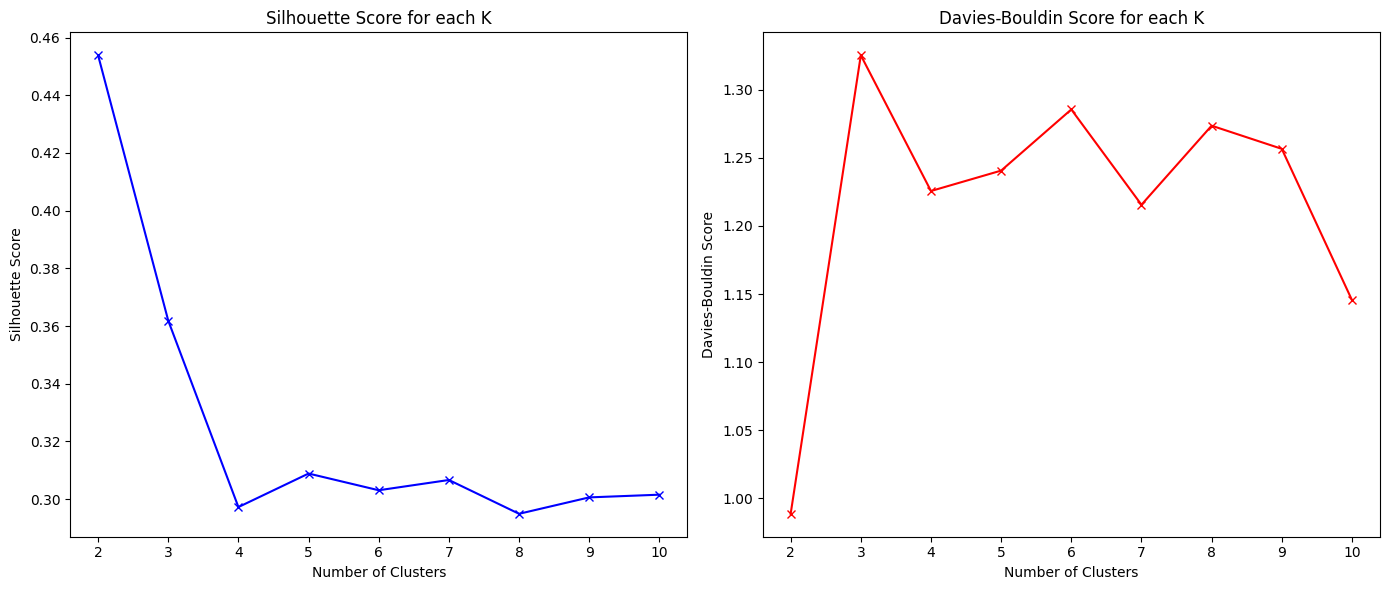

Optimal clusters based on Silhouette Score: 2
Optimal clusters based on Davies-Bouldin Score: 2


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, delimiter='\t')

    # انتخاب ویژگی‌های مرتبط برای تحلیل رفتار مشتری
    features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    # تبدیل به داده‌های عددی و حذف مقادیر NaN
    data[features] = data[features].apply(pd.to_numeric, errors='coerce')
    data = data.dropna(subset=features)

    # استانداردسازی ویژگی‌ها
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    return data_scaled

# محاسبه تعداد بهینه اجزای اصلی با PCA
def optimal_pca_components(data_scaled):
    pca = PCA()
    pca.fit(data_scaled)
    explained_variance = pca.explained_variance_ratio_

    # رسم نمودار واریانس توضیح داده شده
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    # انتخاب تعداد بهینه اجزا
    optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.8) + 1
    return PCA(n_components=optimal_components).fit_transform(data_scaled), optimal_components

# ارزیابی تعداد بهینه خوشه‌ها
def evaluate_clusters(data_pca):
    silhouette_scores = []
    db_scores = []
    k_range = range(2, 11)  # تست تعداد خوشه‌ها از ۲ تا ۱۰

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data_pca)
        silhouette_scores.append(silhouette_score(data_pca, cluster_labels))
        db_scores.append(davies_bouldin_score(data_pca, cluster_labels))

    # رسم نمودارهای امتیازها
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(k_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for each K')

    plt.subplot(1, 2, 2)
    plt.plot(k_range, db_scores, 'rx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.title('Davies-Bouldin Score for each K')

    plt.tight_layout()
    plt.show()

    # پیشنهاد تعداد بهینه خوشه‌ها
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
    optimal_k_davies_bouldin = k_range[np.argmin(db_scores)]

    print(f"Optimal clusters based on Silhouette Score: {optimal_k_silhouette}")
    print(f"Optimal clusters based on Davies-Bouldin Score: {optimal_k_davies_bouldin}")

# اجرای کد اصلی
file_path = '/content/sample_data/marketing_campaign (1).csv'

# مرحله ۱: بارگذاری و استانداردسازی داده‌ها
data_scaled = load_and_preprocess_data(file_path)

# مرحله ۲: محاسبه اجزای اصلی با PCA
data_pca, optimal_components = optimal_pca_components(data_scaled)
print(f"Optimal PCA components: {optimal_components}")

# مرحله ۳: ارزیابی تعداد خوشه‌ها
evaluate_clusters(data_pca)
